In [5]:
#Importing the Libraries and the dataset
import requests
import pandas as pd
import csv
import json

url = "https://api.openaq.org/v1/measurements?country=IN"

In [3]:
r = requests.get(url)


print(r.status_code)
print(r.json())
#created a json file
out_file = open("openaq.json", "w")  
    
json.dump(r.json(), out_file, indent = 6)  
    
out_file.close()

200
{'meta': {'name': 'openaq-api', 'license': 'CC BY 4.0', 'website': 'https://docs.openaq.org/', 'page': 1, 'limit': 100, 'found': 34782808}, 'results': [{'location': 'North Campus, DU, Delhi - IMD', 'parameter': 'o3', 'date': {'utc': '2020-10-10T16:45:00Z', 'local': '2020-10-10T22:15:00+05:30'}, 'value': 32.14, 'unit': 'µg/m³', 'coordinates': {'latitude': 28.6573814, 'longitude': 77.1585447}, 'country': 'IN', 'city': 'Delhi'}, {'location': 'North Campus, DU, Delhi - IMD', 'parameter': 'no2', 'date': {'utc': '2020-10-10T16:45:00Z', 'local': '2020-10-10T22:15:00+05:30'}, 'value': 46.13, 'unit': 'µg/m³', 'coordinates': {'latitude': 28.6573814, 'longitude': 77.1585447}, 'country': 'IN', 'city': 'Delhi'}, {'location': 'North Campus, DU, Delhi - IMD', 'parameter': 'pm25', 'date': {'utc': '2020-10-10T16:45:00Z', 'local': '2020-10-10T22:15:00+05:30'}, 'value': 97.89, 'unit': 'µg/m³', 'coordinates': {'latitude': 28.6573814, 'longitude': 77.1585447}, 'country': 'IN', 'city': 'Delhi'}, {'locat

In [5]:
c = csv.writer(open('myopenaq.csv', 'w'), lineterminator = '\n')

In [8]:
#Adding city, location, parameter, value as columns

for item in r.json()['results']:
    #print(item['measurements'][0]['parameter'])
    #print(item['measurements'][0]['value'])
    c.writerow([item['city'],item['location'],item['parameter'],item['value']])

# Exploratory Data Analysis

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('myopenaq.csv')

In [7]:
df.head()

,city,location,parameter,value
0,Delhi,"North Campus, DU, Delhi - IMD",o3,32.14
1,Delhi,"North Campus, DU, Delhi - IMD",no2,46.13
2,Delhi,"North Campus, DU, Delhi - IMD",pm25,97.89
3,Noida,"Sector - 62, Noida - IMD",co,940.00
4,Noida,"Sector - 62, Noida - IMD",pm10,252.53


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   location   100 non-null    object 
 2   parameter  100 non-null    object 
 3   value      100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [9]:
df.describe()

,value
count,100.000000
mean,224.075700
std,375.674502
min,0.680000
25%,20.385000
50%,60.000000
75%,217.750000
max,2000.000000


In [10]:
df['parameter'].unique()

array(['o3', 'no2', 'pm25', 'co', 'pm10', 'so2'], dtype=object)

In [11]:
df.head()

,city,location,parameter,value
0,Delhi,"North Campus, DU, Delhi - IMD",o3,32.14
1,Delhi,"North Campus, DU, Delhi - IMD",no2,46.13
2,Delhi,"North Campus, DU, Delhi - IMD",pm25,97.89
3,Noida,"Sector - 62, Noida - IMD",co,940.00
4,Noida,"Sector - 62, Noida - IMD",pm10,252.53


# Air Quality Index

In severel tables in this databse, you'll find a column 'aqi' which stands for Air Quality Index. Basically the AQI is the measure of how air is polluted, with respect to some pollutant. That means that for a specific hour in a specific place you'll have different AQIs, one for each pollutant.

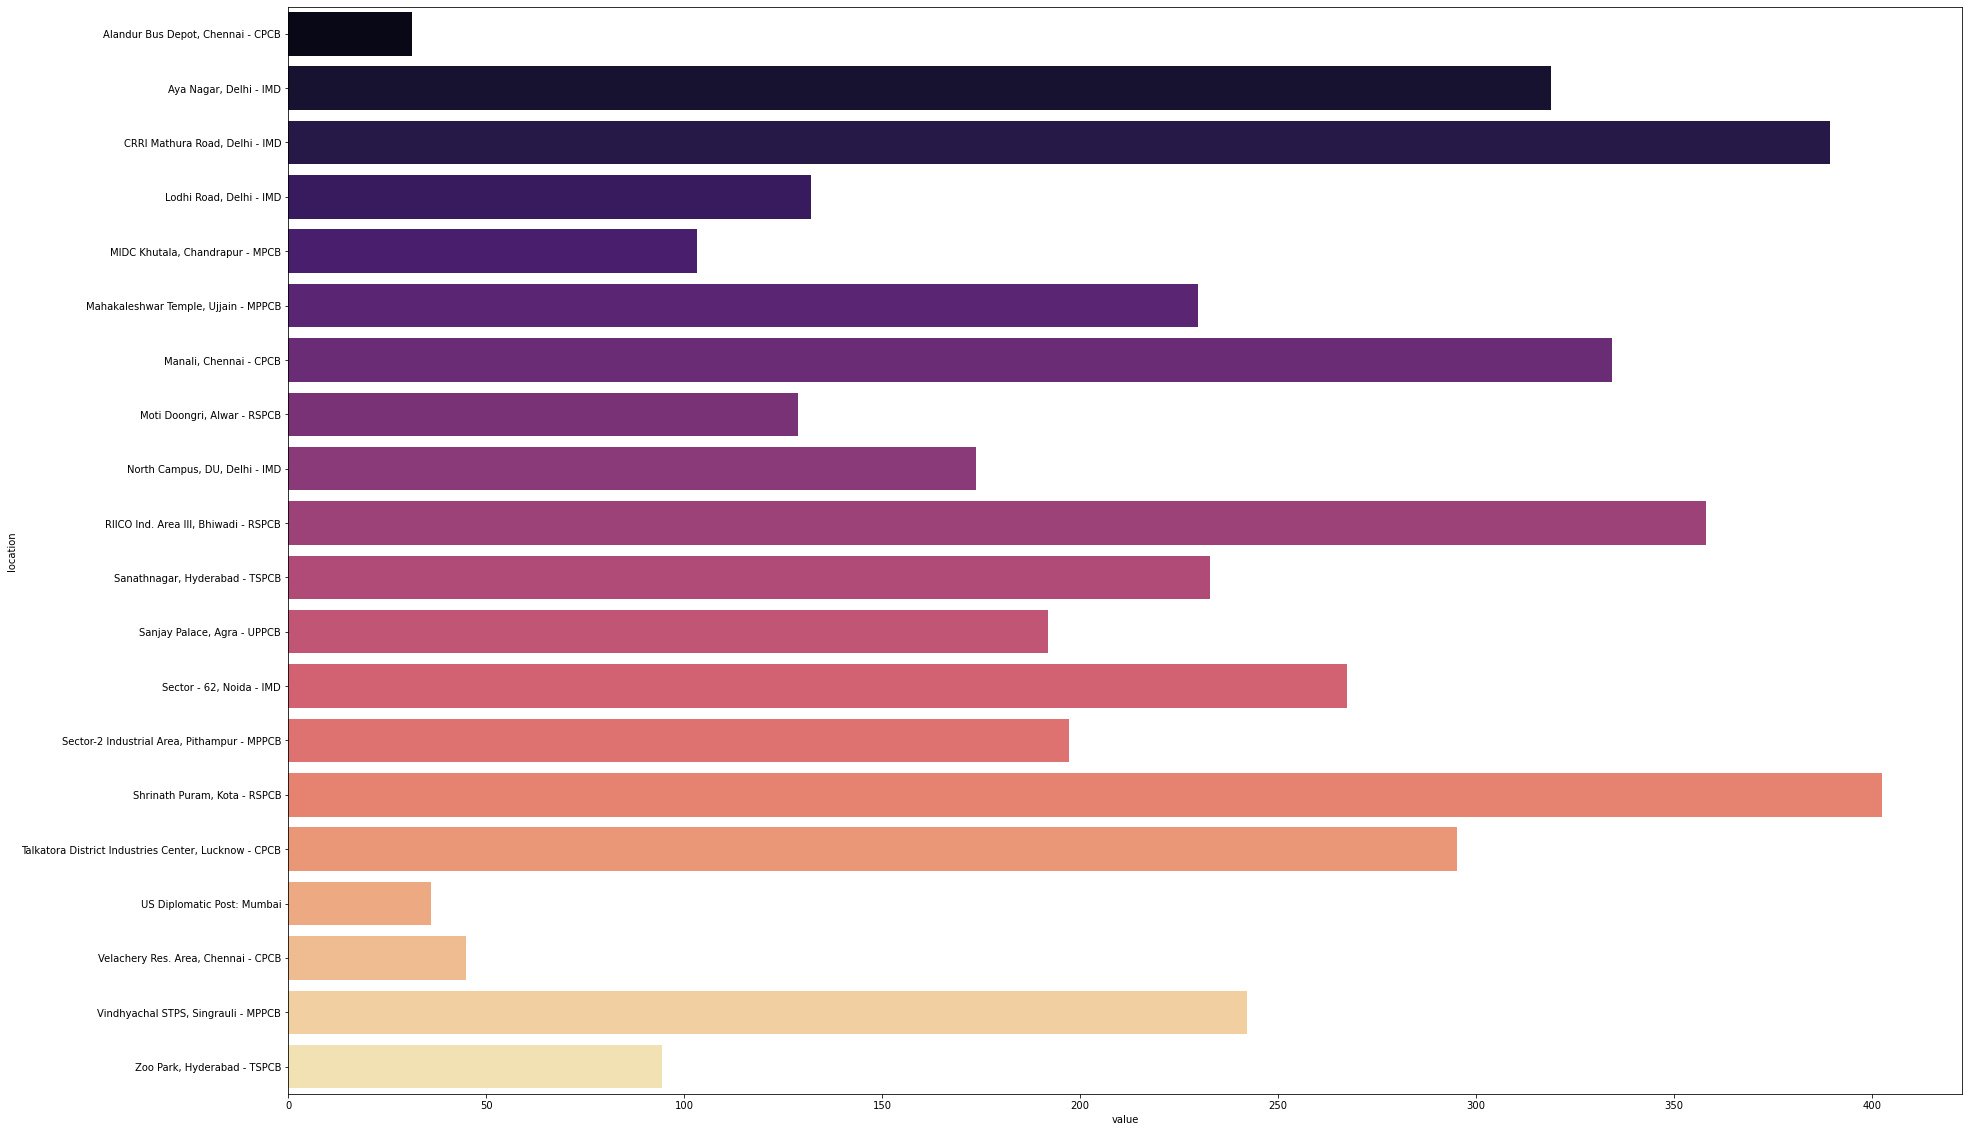

In [12]:
#AQI per location
df_2 = df.groupby('location').mean()
df_2.reset_index(inplace=True)

plt.figure(figsize = (30,20))
sns.barplot(x='value', y='location', data=df_2,palette ='magma');

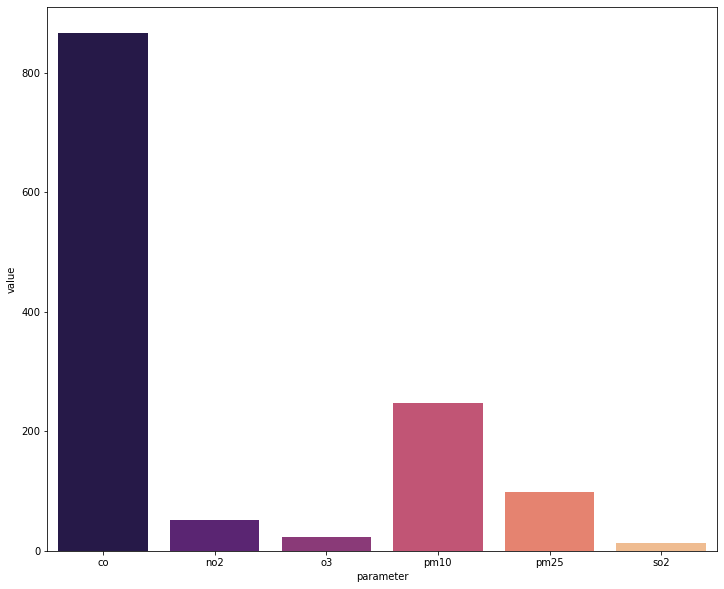

In [13]:
#Distribution of Pollutants 


#We can observe that the concentration of co is higher than the rest

df_3 = df.groupby('parameter').mean()
df_3.reset_index(inplace=True)

plt.figure(figsize = (12,10))
sns.barplot(x='parameter', y='value', data=df_3,palette ='magma');

C:\Users\Home\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value', ylabel='Density'>

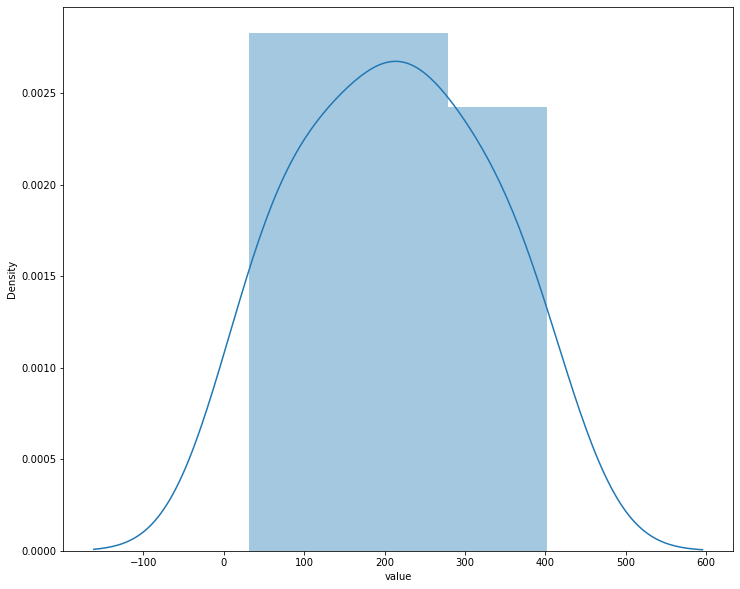

In [45]:
#Distplot of pollution values
plt.figure(figsize = (12,10))
sns.distplot(df_2['value'])

<AxesSubplot:xlabel='value', ylabel='location'>

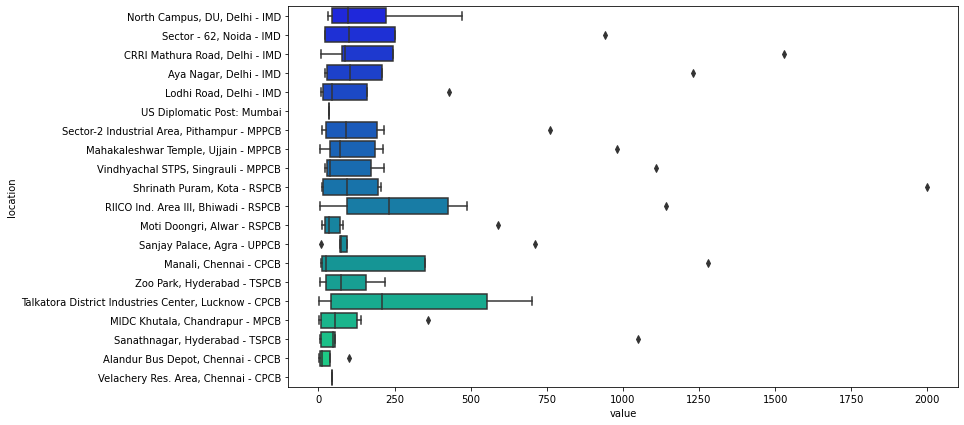

In [15]:
#Bargraph Representaion of parameter values with respect to locations
plt.figure(figsize=(12, 7))
sns.boxplot(x='value',y='location',data=df,palette='winter')

In [16]:
#Pivot table for an overall view of dataset
pivot = df.pivot_table(values='value',index='location',columns='parameter')
pivot = pivot.fillna(0)
pivot

parameter,co,no2,o3,pm10,pm25,so2
location,,,,,,
"Alandur Bus Depot, Chennai - CPCB",100.0,10.29,0.68,0.00,39.48,5.66
"Aya Nagar, Delhi - IMD",1230.0,29.61,21.33,210.31,103.52,0.00
"CRRI Mathura Road, Delhi - IMD",1530.0,76.68,7.49,243.36,88.49,0.00
"Lodhi Road, Delhi - IMD",430.0,16.07,8.22,160.57,44.76,0.00
"MIDC Khutala, Chandrapur - MPCB",360.0,19.74,2.40,141.03,89.23,6.33
"Mahakaleshwar Temple, Ujjain - MPPCB",980.0,35.50,45.40,213.00,98.00,6.40
"Manali, Chennai - CPCB",1280.0,11.21,0.00,0.00,39.02,7.34
"Moti Doongri, Alwar - RSPCB",590.0,24.65,21.76,80.77,43.32,11.62
"North Campus, DU, Delhi - IMD",470.0,46.13,32.14,222.22,97.89,0.00


<AxesSubplot:ylabel='parameter'>

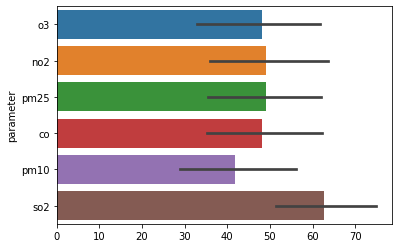

In [17]:
sns.barplot(x=df.index, y="parameter", data=df)

In [18]:
df['location'].unique()

array(['North Campus, DU, Delhi - IMD', 'Sector - 62, Noida - IMD',
       'CRRI Mathura Road, Delhi - IMD', 'Aya Nagar, Delhi - IMD',
       'Lodhi Road, Delhi - IMD', 'US Diplomatic Post: Mumbai',
       'Sector-2 Industrial Area, Pithampur - MPPCB',
       'Mahakaleshwar Temple, Ujjain - MPPCB',
       'Vindhyachal STPS, Singrauli - MPPCB',
       'Shrinath Puram, Kota - RSPCB',
       'RIICO Ind. Area III, Bhiwadi - RSPCB',
       'Moti Doongri, Alwar - RSPCB', 'Sanjay Palace, Agra - UPPCB',
       'Manali, Chennai - CPCB', 'Zoo Park, Hyderabad - TSPCB',
       'Talkatora District Industries Center, Lucknow - CPCB',
       'MIDC Khutala, Chandrapur - MPCB',
       'Sanathnagar, Hyderabad - TSPCB',
       'Alandur Bus Depot, Chennai - CPCB',
       'Velachery Res. Area, Chennai - CPCB'], dtype=object)

# Using Linear Regression to try and Predict the Parameter Values

In [19]:
#Data Mining 

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import pandas as pd



le = LabelEncoder()



In [20]:
df['location'] = df[['location']].apply(le.fit_transform)

In [21]:
df.drop('city',axis=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   100 non-null    int32  
 1   parameter  100 non-null    object 
 2   value      100 non-null    float64
dtypes: float64(1), int32(1), object(1)
memory usage: 2.1+ KB


In [23]:
dummies = pd.get_dummies(df['parameter'])

In [24]:
df = pd.concat([df,dummies],axis=1)

In [25]:
df.head()

,location,parameter,value,co,no2,o3,pm10,pm25,so2
0,8,o3,32.14,0,0,1,0,0,0
1,8,no2,46.13,0,1,0,0,0,0
2,8,pm25,97.89,0,0,0,0,1,0
3,12,co,940.00,1,0,0,0,0,0
4,12,pm10,252.53,0,0,0,1,0,0


In [29]:
df.drop('parameter',axis=1,inplace=True)


KeyError: "['parameter'] not found in axis"

In [32]:
df.drop('co',axis=1,inplace=True)

In [33]:
df.head()

,location,value,no2,o3,pm10,pm25,so2
0,8,32.14,0,1,0,0,0
1,8,46.13,1,0,0,0,0
2,8,97.89,0,0,0,1,0
3,12,940.00,0,0,0,0,0
4,12,252.53,0,0,1,0,0


In [28]:
from sklearn.model_selection import train_test_split

In [34]:
X = df.drop('value',axis=1)
y = df['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
print(lm.intercept_)

854.5822932837993


In [40]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
location,3.055674
no2,-827.908917
o3,-853.956103
pm10,-636.534314
pm25,-780.931717
so2,-874.947434


In [41]:
predictions = lm.predict(X_test)

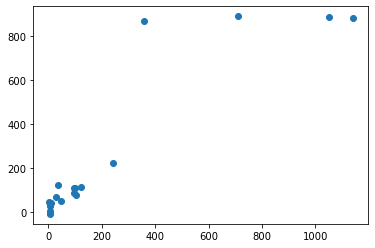

In [42]:
#a few outliers which are the values for co
plt.scatter(y_test,predictions)

C:\Users\Home\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


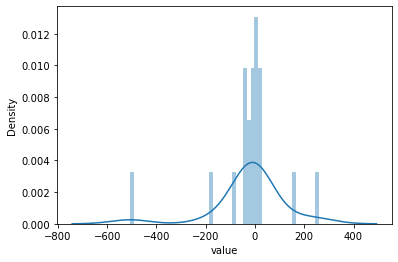

In [43]:
sns.distplot((y_test-predictions),bins=50);

In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 73.73780741922296
MSE: 19874.556351366387
RMSE: 140.9771483303815
